<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/01-an-isolated-two-state-system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - An isolated two state system

In this tutorial we are going to look at a single two state system that doesn't talk to the environment around it. We'll look at two examples
1. When system is in a stationary state
2. When the two states are coupled together

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *

## note, if you start getting errors when using pandas with complex numbers then update Pandas
## - there was a bug that's been recently fixed https://github.com/pandas-dev/pandas/issues/27484

## 1.1 - Stationary state

We begin with a description of our two state system.

We will call the two states **|+>** and **|->** and represent them as

$$
|+> = \begin{bmatrix}
 1   \\
 0   \\
 \end{bmatrix}, 
|-> = \begin{bmatrix}
 0   \\
 1   \\
\end{bmatrix}
$$

At any time, the state of the system can be described by

$$
\psi(t) = \psi_+(t)|+> +\,\ \psi_-(t)|->
$$

where the complex numbers $\psi_+$ and $\psi_-$ are [probability amplitudes](https://en.wikipedia.org/wiki/Probability_amplitude) (a.k.a quantum amplitudes or just amplitudes) whose modulus squared gives us the probability to find the system in that particular state. 

For this tutorial we will assume that the two states have the same energy. The hamiltonian matrix will therefore take the form

$$
H = \begin{bmatrix}
 E_0  &  0  \\
 0  &  E_0  \\
\end{bmatrix} = E_0 I
$$

where $I$ is the identity matrix.

In this example we will set $E_0=1$.

We will now use QuTiP to find out how this system evolves in time. It should be noted that $\hbar=1$ in QuTiP so energy and frequency are interchangable.

In [2]:
E0 = 1
H = E0*qeye(2)

Let's initialise the 2 state system. In Qutip, this can be done in several ways (cf QuTip [intro notebook](https://github.com/jrjohansson/qutip-lectures/blob/master/Lecture-0-Introduction-to-QuTiP.ipynb) and [intro docs](http://qutip.org/docs/latest/guide/guide-basics.html))

For the $|+>$ state: `Qobj([[1], [0]])` or `basis(2, 0)`

For the $|->$ state: `Qobj([[0], [1]])` or `basis(2, 1)`

In [3]:
plus = basis(2, 0)
minus = basis(2, 1)

We'll go with $\psi(t=0) \equiv \psi_0 = |+>$

In [4]:
psi0 = plus

Now, let's evolve the state $\psi$ over time by solving the Schrödinger equation

$$
i \hbar \frac{d}{d t}\psi(t) = \hat H\psi(t)
$$

Qutip has many [solvers](http://qutip.org/docs/latest/apidoc/functions.html#dynamics-and-time-evolution) that can do this. We will start with [sesolve](http://qutip.org/docs/latest/apidoc/functions.html#module-qutip.sesolve) as demonstrated [here](http://qutip.org/docs/latest/guide/dynamics/dynamics-master.html#unitary-evolution).

In [5]:
times = np.linspace(0.0, 10.0, 1000) # simulation time
result = sesolve(H, psi0, times) 

QuTiP returns a list of the states for different times. We'll transform this into a dataframe to make things easier to visualise. We'll make a function for this so we can reuse it later.

In [6]:
def states_to_df(states,times):
    psi_plus = np.zeros(len(times),dtype="complex128")  # To store the amplitude of the |+> state
    psi_minus = np.zeros(len(times),dtype="complex128") # To store the amplitude of the |-> state

    for i, state in enumerate(states):
        psi_plus[i] = state[0][0][0]
        psi_minus[i] = state[1][0][0]

    return pd.DataFrame(data={"+":psi_plus, "-":psi_minus}, index=times)

In [7]:
df_stationary =  states_to_df(result.states, times)

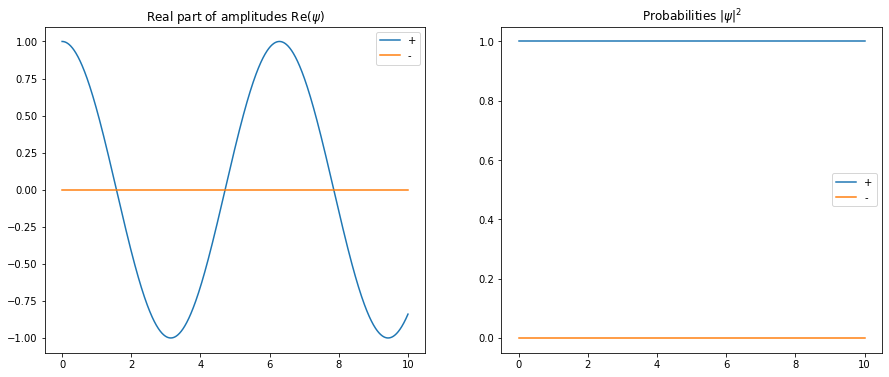

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df_stationary.plot(title="Real part of amplitudes Re($\psi$)", ax=axes[0]);
(df_stationary.abs()**2).plot(title="Probabilities $|\psi|^2$", ax=axes[1]);

The probability to find the system in the $|+>$ state (i.e. $|\psi_+|^2$) state remains constant throughout because it is a stationary state, i.e. a state of constant energy.

The amplitude oscillates at a frequency determined by the $E_0$ parameter which we set to equal 1 at the start and so we have a period of $2\pi$.

## 1.2 Coupling between two states of the same energy

When the two states are coupled, e.g. the case of the [ammonia molecule](https://www.feynmanlectures.caltech.edu/III_08.html#Ch8-S6), the hamiltonian matrix will contain off diagonal elements

$$
H = \begin{bmatrix}
 E_0  &  -A  \\
 -A  &  E_0  \\
\end{bmatrix}
$$

By using common two-state operators such as the [Pauli matrices](https://en.wikipedia.org/wiki/Pauli_matrices):

$$
\sigma_x = \begin{bmatrix}
0  &  1  \\
 1  &  0  \\
\end{bmatrix}
$$

$$
\sigma_y = \begin{bmatrix}
0  &  -i  \\
 i  &  0  \\
\end{bmatrix}
$$

$$
\sigma_z = \begin{bmatrix}
1  &  0  \\
 0  &  -1  \\
\end{bmatrix}
$$

The hamiltonian can be re-written as:

$$
H = E_0 I - A \sigma_x
$$

QuTiP allows us to conveniently reference the Pauli matrices using `sigmax()`, `sigmay()` and `sigmaz()`.

In [9]:
psi0 = plus

E0 = 1.0
A = 0.1 # coupling "strength"

H = E0*qeye(2) - A*sigmax()

times = np.linspace(0.0, 60.0, 1000) # simulation time

result = sesolve(H, psi0, times)
df_coupled =  states_to_df(result.states, times)

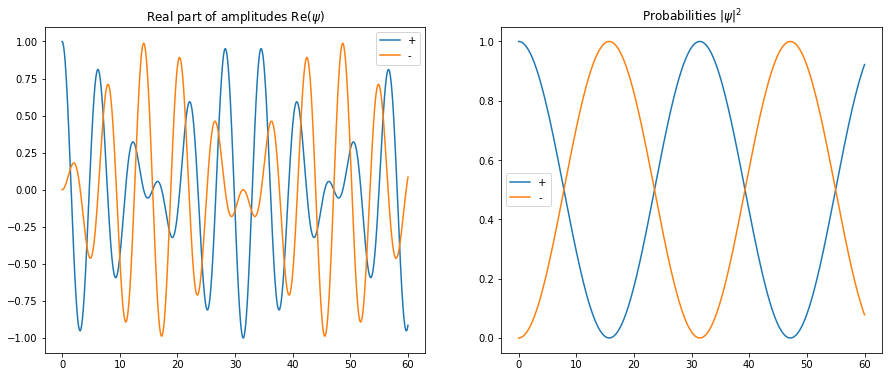

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df_coupled.plot(title="Real part of amplitudes Re($\psi$)", ax=axes[0]);
(df_coupled.abs()**2).plot(title="Probabilities $|\psi|^2$", ax=axes[1]);

Now the situation is more complicated.

Although we again initialised the system in $|+>$ state, the probability to find the system in that state at a later time is no longer constant - it slowly oscillates. This tells us that the $|+>$ is no longer a state of constant energy (same for $|->$). What's going on?

This behaviour is identical to a system of two coupled pendulums - each state in the quantum system is analagous to one of the pendulums. If you displace only one pendulum, then its maximum amplitude oscillates slowly as it transfers energy to the second pendulum and then back again (as you can see in this [video](https://youtu.be/CjJVBvDNxcE?t=56)).

In the language of classical physics, this slow oscillation of the maximum amplitude results from the [beating](https://en.wikipedia.org/wiki/Beat_(acoustics) of two frequencies that correspond to different [normal modes](https://www.physics.utoronto.ca/~sandra/PHY238Y/Lectures/Lect4_Coupl_osc.pdf). These modes can be distinguished when you displace both pendulums, first in phase and then out of phase (see [this video](https://youtu.be/CjJVBvDNxcE?t=14)). 

In the absence of coupling, there are also two frequencies in the system, but they are identical because the pendulums are identical. In effect, the coupling splits the two frequencies apart and that is also what's happening in our quantum system.

Instead of our two states |+> and |-> having the same energy $E_0$, we can now expect to find that the states:

$|+> + \,\  |->$ - in phase

$|+> - \,\ |->$ - out of phase

should be our states of constant energy - our stationary states (we will of course need to normalise these states).

Let's use QuTiP to see this.

QuTiP allows us to easily combine states together and make sure they are normalised using the `unit()` function

In [11]:
in_phase = (plus + minus).unit()
out_phase = (plus - minus).unit()

In [12]:
E0 = 1.0
A = 0.1

H = E0*qeye(2) - A*sigmax()

times = np.linspace(0.0, 10.0, 1000) 

# First let's get the evolution of the state when initialised as "in phase"
result = sesolve(H, in_phase, times)
df_coupled_in_phase =  states_to_df(result.states, times)

# Secondly let's get the evolution of the state when initialised as "out of phase"
result = sesolve(H, out_phase, times)
df_coupled_out_phase =  states_to_df(result.states, times)

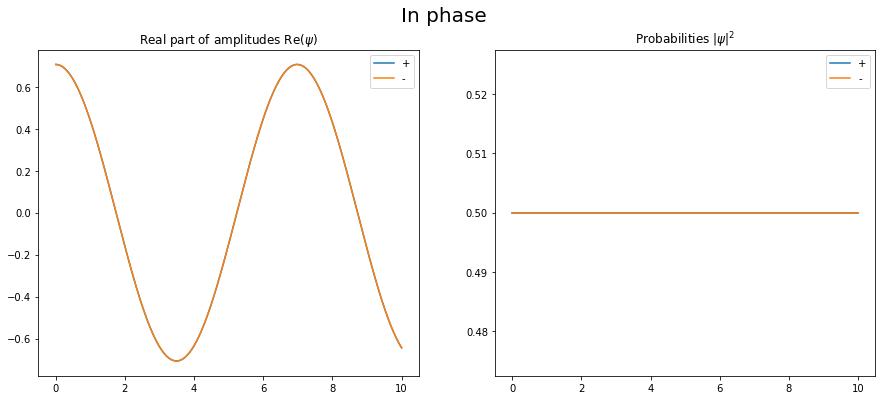

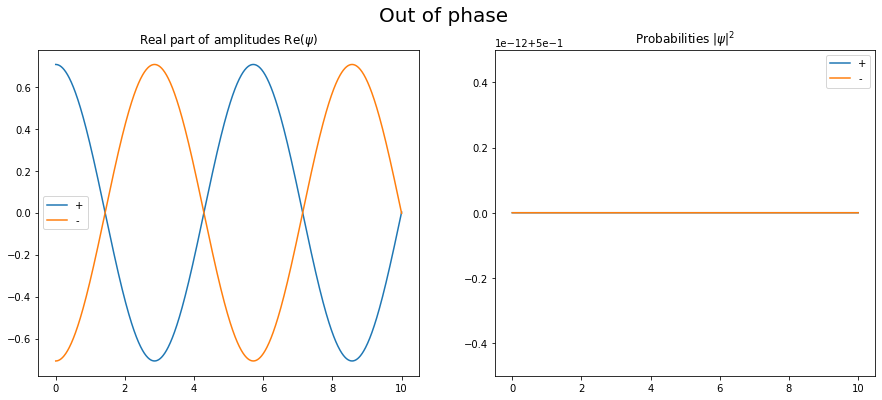

In [13]:
## First plot the In phase solution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df_coupled_in_phase.plot(title="Real part of amplitudes Re($\psi$)", ax=axes[0]);
(df_coupled_in_phase.abs()**2).plot(title="Probabilities $|\psi|^2$", ax=axes[1]);
fig.suptitle('In phase', fontsize=20)

## Secondly plot the Out of phase solution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df_coupled_out_phase.plot(title="Real part of amplitudes Re($\psi$)", ax=axes[0]);
(df_coupled_out_phase.abs()**2).plot(title="Probabilities $|\psi|^2$", ax=axes[1]);
fig.suptitle('Out of phase', fontsize=20);

# Use the following to remove the y-offset from out of phase probabilities if you find there is one
# axes[1].get_yaxis().get_major_formatter().set_useOffset(False)

In both cases, the probabilities to find the state in either |+> or |-> is 0.5 (note any offset that can sometimes appear in the y axes of the plots). The amplitudes can also be seen to evolve with the same frequency - just like we saw in the coupled pendulum problem.

What about the energy of our newly found stationary states?

We can use QuTiP to help us out. If we supply a list of operators to `sesolve` in the 4th argument, e.g. `sesolve(H, psi0, times,[sigmax(), sigmay()]` then instead of returning the evolution of the state we get the evolution of the expectation value of the supplied operators.

Since the hamiltonian is an operator, we can supply `H` and then find how the energy of our state changes over time.


In [14]:
result_in_phase = sesolve(H, in_phase, times, [H])
result_out_phase = sesolve(H, out_phase, times, [H])

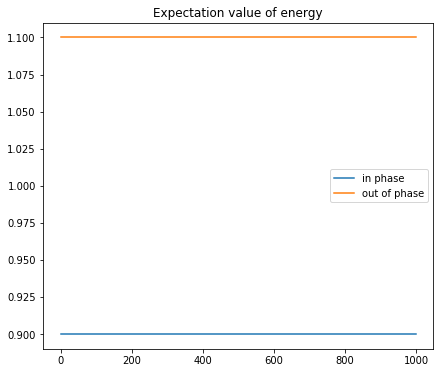

In [15]:
plt.figure(figsize=(7,6))
plt.title("Expectation value of energy")
plt.plot(result_in_phase.expect[0], label="in phase")
plt.plot(result_out_phase.expect[0], label="out of phase")
plt.legend();

We can see that the energies of our new stationary states are:

$E_0 - A$ for $|+> + \,\  |->$ - in phase

$E_0 + A$ for $|+> - \,\  |->$ - out of phase

So, there is energetic price to be paid for the states to be out of phase with each other.

Although it is fun and insightful to go through the process of solving the Schrödinger equation, there is another way to get at the stationary states and their corresponding energies - we simply need to find the eigenvectors and eigenvalues of the hamiltonian.

QuTip gives us a easy way to do this using `eigenstates()`.

In [16]:
H.eigenstates()

(array([0.9, 1.1]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.70710678]
  [-0.70710678]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.70710678]
  [ 0.70710678]]], dtype=object))

The first part of the output gives the eigenvalues `[0.9,1.1]` - these are the energies we found above

The second part gives the two normalised eigenvectors `[-0.70710678 -0.70710678]` (in phase) and `[-0.70710678 0.70710678]` (out of phase) that we also discovered earlier.


## Next up...
We'll introduce an external force field to our coupled two state system and in the process discover how we can use this force to create transitions between different energy states  